## Project 1 - Surface Type Classification
xz2830  
Xixi Zhou

### Load packages and data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
x_train=pd.read_csv('../input/career-con-2019/X_train.csv')
y_train=pd.read_csv('../input/career-con-2019/y_train.csv')
x_test=pd.read_csv('../input/career-con-2019/X_test.csv')
sub=pd.read_csv('../input/career-con-2019/sample_submission.csv')
#split X_train
samples=20
time_series=128
start_x = x_train.shape[0] - samples*time_series
X_train_new, X_test_new = x_train.iloc[:start_x], x_train.iloc[start_x:]
# split y_train
start_y = y_train.shape[0] - samples
y_train_new, y_test_new = y_train.iloc[:start_y], y_train.iloc[start_y:]
print('data loaded')

data loaded


### Data exploration
Check the train set.

In [3]:
x_train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


The measurement number is 128 in each series.  
there are 3810 series.  
Features in train set seems like normal distribution.  
The range of linear_acceleration is large.(max-min).

In [4]:
x_train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


Train set has no missing data.

In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


Check y_train data.

In [6]:
y_train.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


X_train have entries:
* Identifiers:row_id,series_id,measurement_number;  
* Orientation:orientation_x,orientation_y,orientation_z,orientation_w;  
* angular velocities:angular_velocity_X, angular_velocity_Y, angular_velocity_z;  
* linear accelerations:linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z.
y_train have entries:
* series_id - is the foreign key reference to X_train.series_id
* group_id
* surface

Check the value of every kind of surface in y_train set.  
There are 9 kinds of surfaces.  
It shows that the number of concrete is largest and the number of hard_tiles is smallest.They are uneven distributed.  

In [7]:
y_train['surface'].value_counts()

concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64

There are also no missing data in y_train.

In [8]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 3 columns):
series_id    3810 non-null int64
group_id     3810 non-null int64
surface      3810 non-null object
dtypes: int64(2), object(1)
memory usage: 89.4+ KB


Let's sort the target data by group_id.It shows the the distribution is not even either.

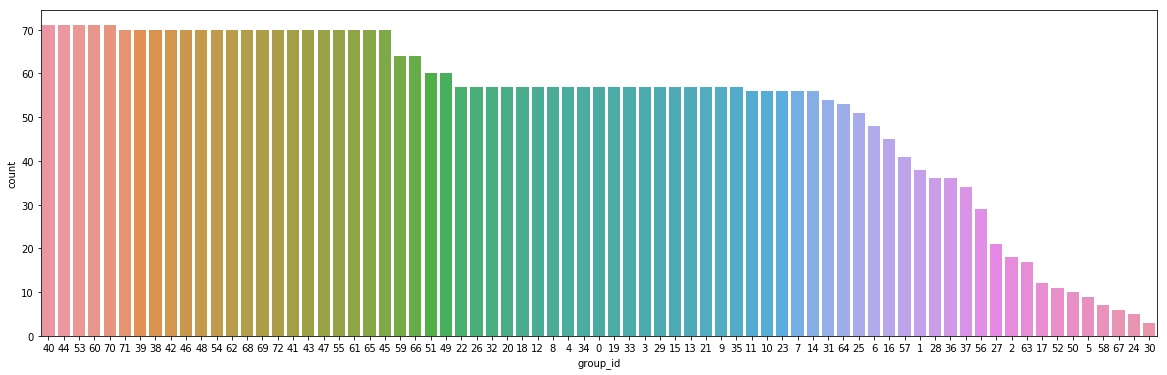

In [9]:
plt.figure(figsize=(20,6))
sns.countplot(x='group_id',data=y_train,order=y_train.group_id.value_counts().index)
plt.show()

### Feature Engineering
In IMU sensor data,there are four coordinates:X,Y,Z,W.    
In general,we use X,Y,Z to represent coordinates.But Euler Angles have a limitation called "gimbal lock".  
To add features, we transform quaternion coordinates to Euler angles.

In [10]:
def toEuler(x,y,z,w):
    t0=2.0*(w*x+y*z)
    t1=1.0-2.0*(x*x+y*y)
    Euler_X=math.atan2(t0,t1)
    
    t2=2.0*(w*y-z*x)
    if t2 > +1.0:
        t2=1.0
    if t2<-1.0:
        t2=-1.0
    Euler_Y=math.asin(t2)
    
    t3=(w*z+x*y)*2.0
    t4=1.0-(y**2+z**2)*2.0
    Euler_Z=math.atan2(t3,t4)
    
    return Euler_X,Euler_Y,Euler_Z

In [11]:
def getEulerFeatures(x,y,z,w):
    xlist,ylist,zlist=[],[],[]
    for i in range(0,len(x)):
        E_x,E_y,E_z=toEuler(x[i],y[i],z[i],w[i])
        xlist.append(E_x)
        ylist.append(E_y)
        zlist.append(E_z)
    return xlist,ylist,zlist

In [12]:
def getTotal(x,y,z):
    total=(x**2+y**x+z**2)**0.5
    return total

We add features such as Euler angles and r_angl and angl_euler showing below.

In [13]:
def input_data(data):
    x,y,z,w=data['orientation_X'].tolist(),data['orientation_Y'].tolist(),data['orientation_Z'].tolist(),data['orientation_W'].tolist()
    xlist,ylist,zlist=getEulerFeatures(x,y,z,w)
    data['Euler_X']=xlist
    data['Euler_Y']=ylist
    data['Euler_Z']=zlist
    data['total_angl']=getTotal(data['angular_velocity_X'],data['angular_velocity_Y'],data['angular_velocity_Z'])
    data['total_lin']=getTotal(data['linear_acceleration_X'],data['linear_acceleration_Y'],data['linear_acceleration_Z'])
    
    data['total_xyz']=(data['orientation_X']**2+data['orientation_Y']**2+data['orientation_Z']**2)**0.5
    data['total_euler']=(data['Euler_X']**2+data['Euler_Y']**2+data['Euler_Z']**2)**0.5
    
    data['r_angl']=data['total_lin']/data['total_angl'] 
    data['angl_euler']=data['total_angl']/data['total_euler'] 
    return data   

In [14]:
X_train_new=input_data(X_train_new)
X_test_new=input_data(X_test_new)
x_train=input_data(x_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Let's merge x_train and y_train to find the relationship between surface and features.

In [15]:
df=pd.merge(x_train,y_train,on='series_id')
df.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,...,Euler_Y,Euler_Z,total_angl,total_lin,total_xyz,total_euler,r_angl,angl_euler,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,...,-0.024668,1.396664,0.811647,9.811142,0.994368,3.167882,12.087949,0.256211,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,...,-0.024662,1.396646,0.890376,9.479759,0.994364,3.167808,10.646916,0.281070,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,...,-0.024728,1.396682,0.987241,8.781200,0.994372,3.167847,8.894684,0.311644,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,...,-0.024770,1.396721,1.026170,10.156409,0.994374,3.167830,9.897392,0.323935,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,...,-0.024784,1.396693,0.987594,10.492678,0.994368,3.167826,10.624480,0.311758,13,fine_concrete


From figures showing below,the differences between surface is obvious.  
Most features' distribution are normal distribution.  
So in order to improve accuracy,let's add some new features:max,min,range,median,mean,std and etc.

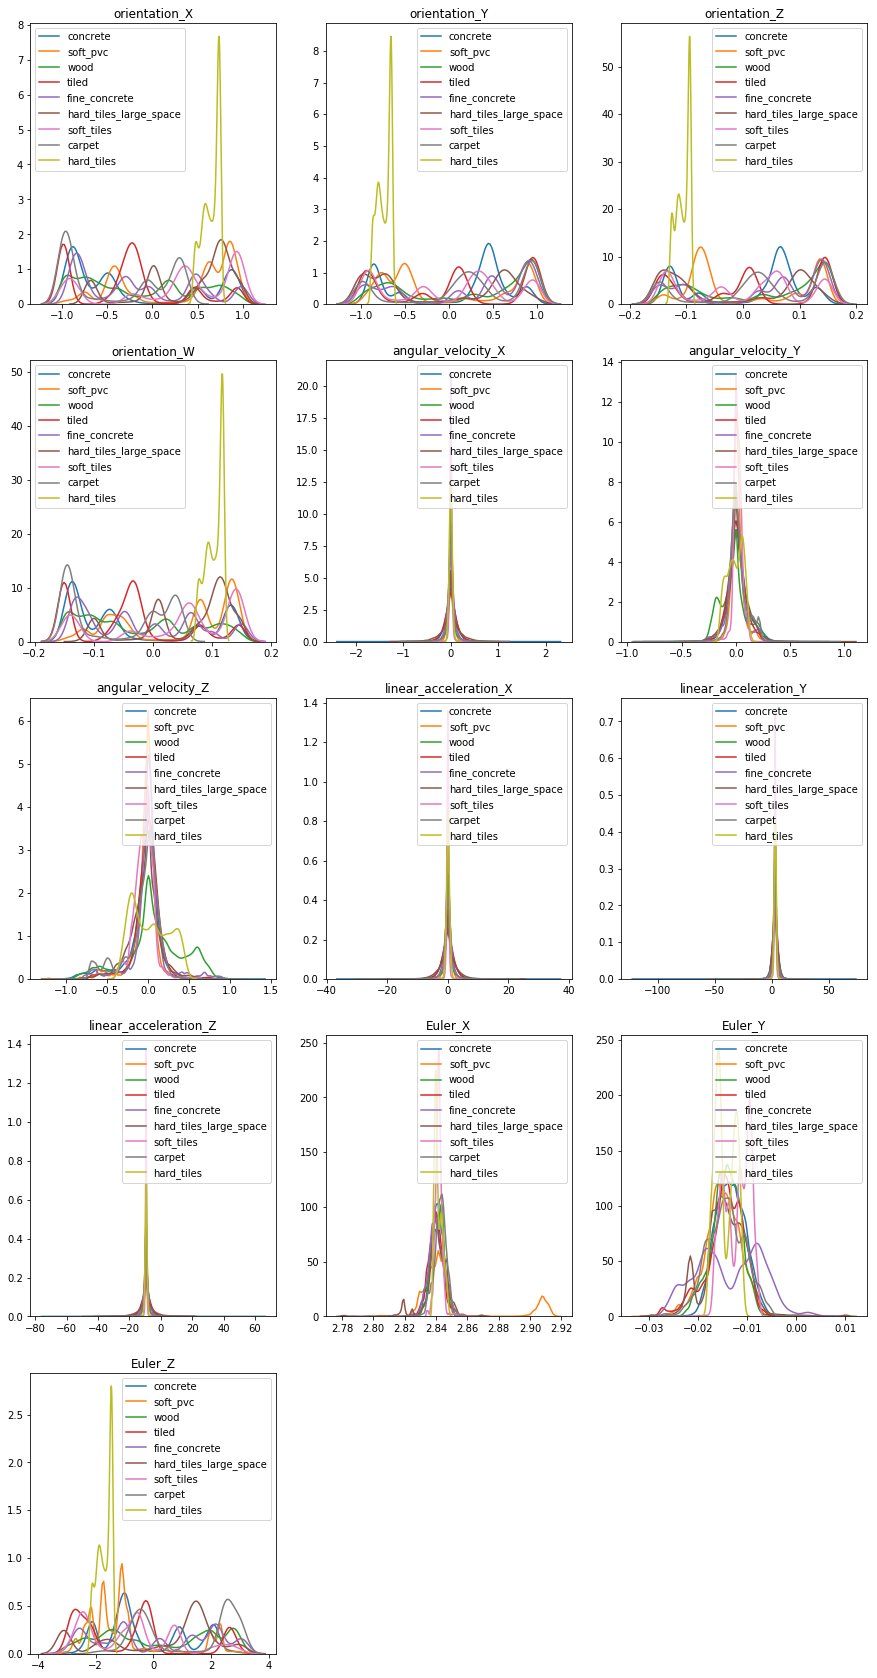

In [16]:
features=x_train.columns[3:16]
sfs=(y_train['surface'].value_counts()).index
plt.figure(figsize=(15,30))
i=0
for col in features:
    i+=1
    plt.subplot(5,3,i)
    plt.title(col)
    for surface in sfs:
        tp=df[df['surface']==surface]
        sns.kdeplot(tp[col],label=surface)
plt.show()

Add features related to normal distribution.

In [17]:
def data_cal(data):
    prepd=pd.DataFrame()
    for col in data.columns:
        if col in['row_id','series_id','measurement_number']:
            continue
        prepd[col+'_max']=data.groupby(['series_id'])[col].max()
        prepd[col+'_min']=data.groupby(['series_id'])[col].min()
        prepd[col+'_range']=prepd[col+'_max']-prepd[col+'_min']
        prepd[col+'_mean']=data.groupby(['series_id'])[col].mean()
        prepd[col+'_median']=data.groupby(['series_id'])[col].median()
        prepd[col+'_std']=data.groupby(['series_id'])[col].std()
        
    return prepd

In [18]:
X_train_new=data_cal(X_train_new)
X_test_new=data_cal(X_test_new)

In [19]:
X_train_new.head()
#print(X_train_new.shape)

,orientation_X_max,orientation_X_min,orientation_X_range,orientation_X_mean,orientation_X_median,orientation_X_std,orientation_Y_max,orientation_Y_min,orientation_Y_range,orientation_Y_mean,...,r_angl_range,r_angl_mean,r_angl_median,r_angl_std,angl_euler_max,angl_euler_min,angl_euler_range,angl_euler_mean,angl_euler_median,angl_euler_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.75822,-0.75953,0.00131,-0.758666,-0.758530,0.000363,-0.63306,-0.63456,0.00150,-0.634008,...,5.892587,9.187574,8.977640,1.445817,0.447646,0.256211,0.191435,0.329077,0.327541,0.035718
1,-0.95837,-0.95896,0.00059,-0.958606,-0.958595,0.000151,0.24270,0.24074,0.00196,0.241867,...,16.451302,9.906870,9.740453,2.984482,0.528171,0.176604,0.351567,0.354180,0.348713,0.060721
2,-0.50944,-0.51434,0.00490,-0.512057,-0.512035,0.001377,-0.84490,-0.84779,0.00289,-0.846171,...,5.803674,9.415735,9.332111,1.449069,0.381526,0.222406,0.159120,0.289093,0.284054,0.035385
3,-0.93884,-0.93968,0.00084,-0.939169,-0.939170,0.000227,0.31147,0.30943,0.00204,0.310140,...,17.903604,8.909608,8.489902,3.791310,0.891309,0.207502,0.683807,0.395002,0.364902,0.140233
4,-0.88673,-0.89689,0.01016,-0.891301,-0.890940,0.002955,0.43740,0.41646,0.02094,0.428144,...,5.296184,9.443396,9.532248,1.099300,0.396751,0.285342,0.111409,0.336487,0.334674,0.024553


### Label Encoding
After featrue engineering,we need to train model.  
Before that,let's do label encoding first to transform words in 'surface' to numbers which can be identified.

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train_new['surface']=encoder.fit_transform(y_train_new['surface'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
print(X_train_new.shape)
print(y_train_new['surface'].shape)
print(X_test_new.shape)

(3790, 114)
(3790,)
(20, 114)


We deal with the possible missing data or invalid by using fillna() and replace() functions.

In [22]:
X_train_new.fillna(0, inplace = True)
X_test_new.fillna(0, inplace = True)

X_train_new.replace(-np.inf, 0, inplace = True)
X_train_new.replace(np.inf, 0, inplace = True)
X_test_new.replace(-np.inf, 0, inplace = True)
X_test_new.replace(np.inf, 0, inplace = True)

### Run Model
In this part,I choose two different models:*GBDT* and *Random Forest*.  
Decision tree is a good model for classification.  
And two model are all combination of decision trees with good quality to predict.But the kernel of two models are different.  
**Random Forest** is a Bagging method.Each tree will be trained independently by using random sample of data.It is hard to overfit compare to GBDT.  
**GBDT ** is a Boosting method.New trees help correct errors of previous trained tree.And it is slower than RF.But it may be overfitting because of noisy.  

Validation Strategy: Straitified KFold

#### GBDT
First model is GBDT by using GradientBoosting Classifier.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

folds=StratifiedKFold(n_splits=3,shuffle=True,random_state=5000)
te=np.zeros((X_test_new.shape[0],9))
tr=np.zeros((X_train_new.shape[0]))
score=0
for i, (tr_index,tar_index) in enumerate(folds.split(X_train_new,y_train_new['surface'])):
    print('fold:',i)
    Model_train=GradientBoostingClassifier(max_depth=10,n_estimators=50)
    Model_train.fit(X_train_new.iloc[tr_index],y_train_new['surface'][tr_index])
    tr[tar_index]=Model_train.predict(X_train_new.iloc[tar_index])   
    score+=Model_train.score(X_train_new.iloc[tar_index],y_train_new['surface'][tar_index])
    print('score',Model_train.score(X_train_new.iloc[tar_index],y_train_new['surface'][tar_index]))
print('avg_score',score/folds.n_splits)

fold: 0
score 0.8496835443037974
fold: 1
score 0.8606492478226445
fold: 2
score 0.8495645288994458
avg_score 0.8532991070086293


<class 'numpy.ndarray'>


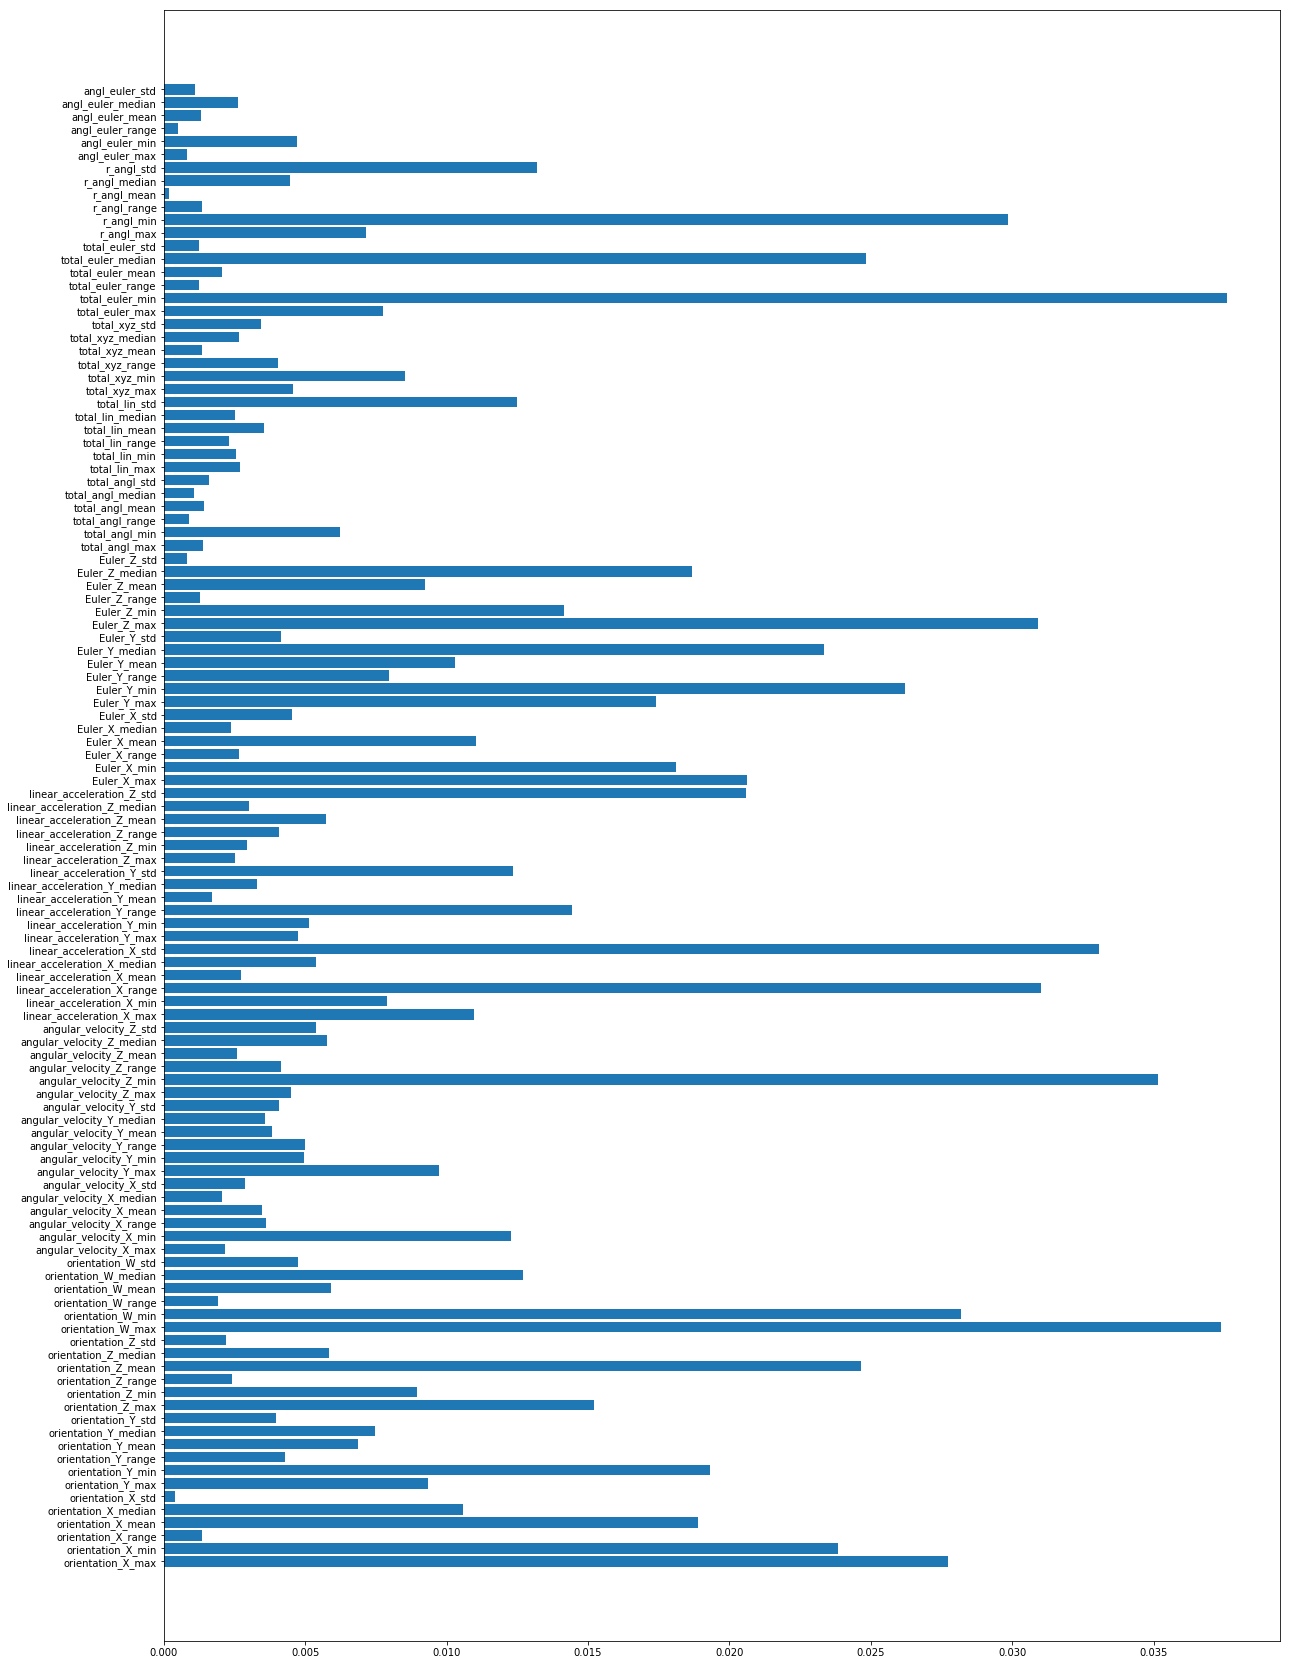

In [24]:
importance=Model_train.feature_importances_
features=X_train_new.columns
print(type(importance))
plt.figure(figsize=(20,30))
plt.barh(range(len(importance.tolist())),importance.tolist(),tick_label=features.tolist())
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(tr,y_train_new['surface'])

array([[136,   6,   0,   0,   2,   6,   2,   4,   6],
       [ 12, 678,  16,   1,  17,  20,   5,  21,  23],
       [  5,  16, 299,   0,   6,   6,   4,   5,  11],
       [  3,   4,   2,   8,   2,   3,   6,   0,   7],
       [  1,   7,   5,   0, 263,   3,   0,   2,   2],
       [  6,  29,  11,   1,   4, 657,  10,  12,  27],
       [  6,   4,   3,   1,   1,   7, 246,   2,   6],
       [  7,  12,   3,   0,   3,   5,   9, 443,  18],
       [ 13,  20,  21,  10,   7,  23,  15,  19, 504]])

#### RandomForest
Second model is RandomForestClassifier.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
folds=StratifiedKFold(n_splits=5,shuffle=True,random_state=5000)
te=np.zeros((X_test_new.shape[0],9))
tr=np.zeros((X_train_new.shape[0]))
score=0
for i, (tr_index,tar_index) in enumerate(folds.split(X_train_new,y_train_new['surface'])):
    print('fold:',i)
    Model_train=RandomForestClassifier(n_estimators=200,n_jobs=-1)
    Model_train.fit(X_train_new.iloc[tr_index],y_train_new['surface'][tr_index])
    tr[tar_index]=Model_train.predict(X_train_new.iloc[tar_index])
    te+=Model_train.predict_proba(X_test_new)/folds.n_splits
    score+=Model_train.score(X_train_new.iloc[tar_index],y_train_new['surface'][tar_index])
    print('score',Model_train.score(X_train_new.iloc[tar_index],y_train_new['surface'][tar_index]))
print('avg_score',score/folds.n_splits)


fold: 0
score 0.8984168865435356
fold: 1
score 0.899736147757256
fold: 2
score 0.8984168865435356
fold: 3
score 0.9234828496042217
fold: 4
score 0.9195250659630607
avg_score 0.9079155672823219


<class 'numpy.ndarray'>


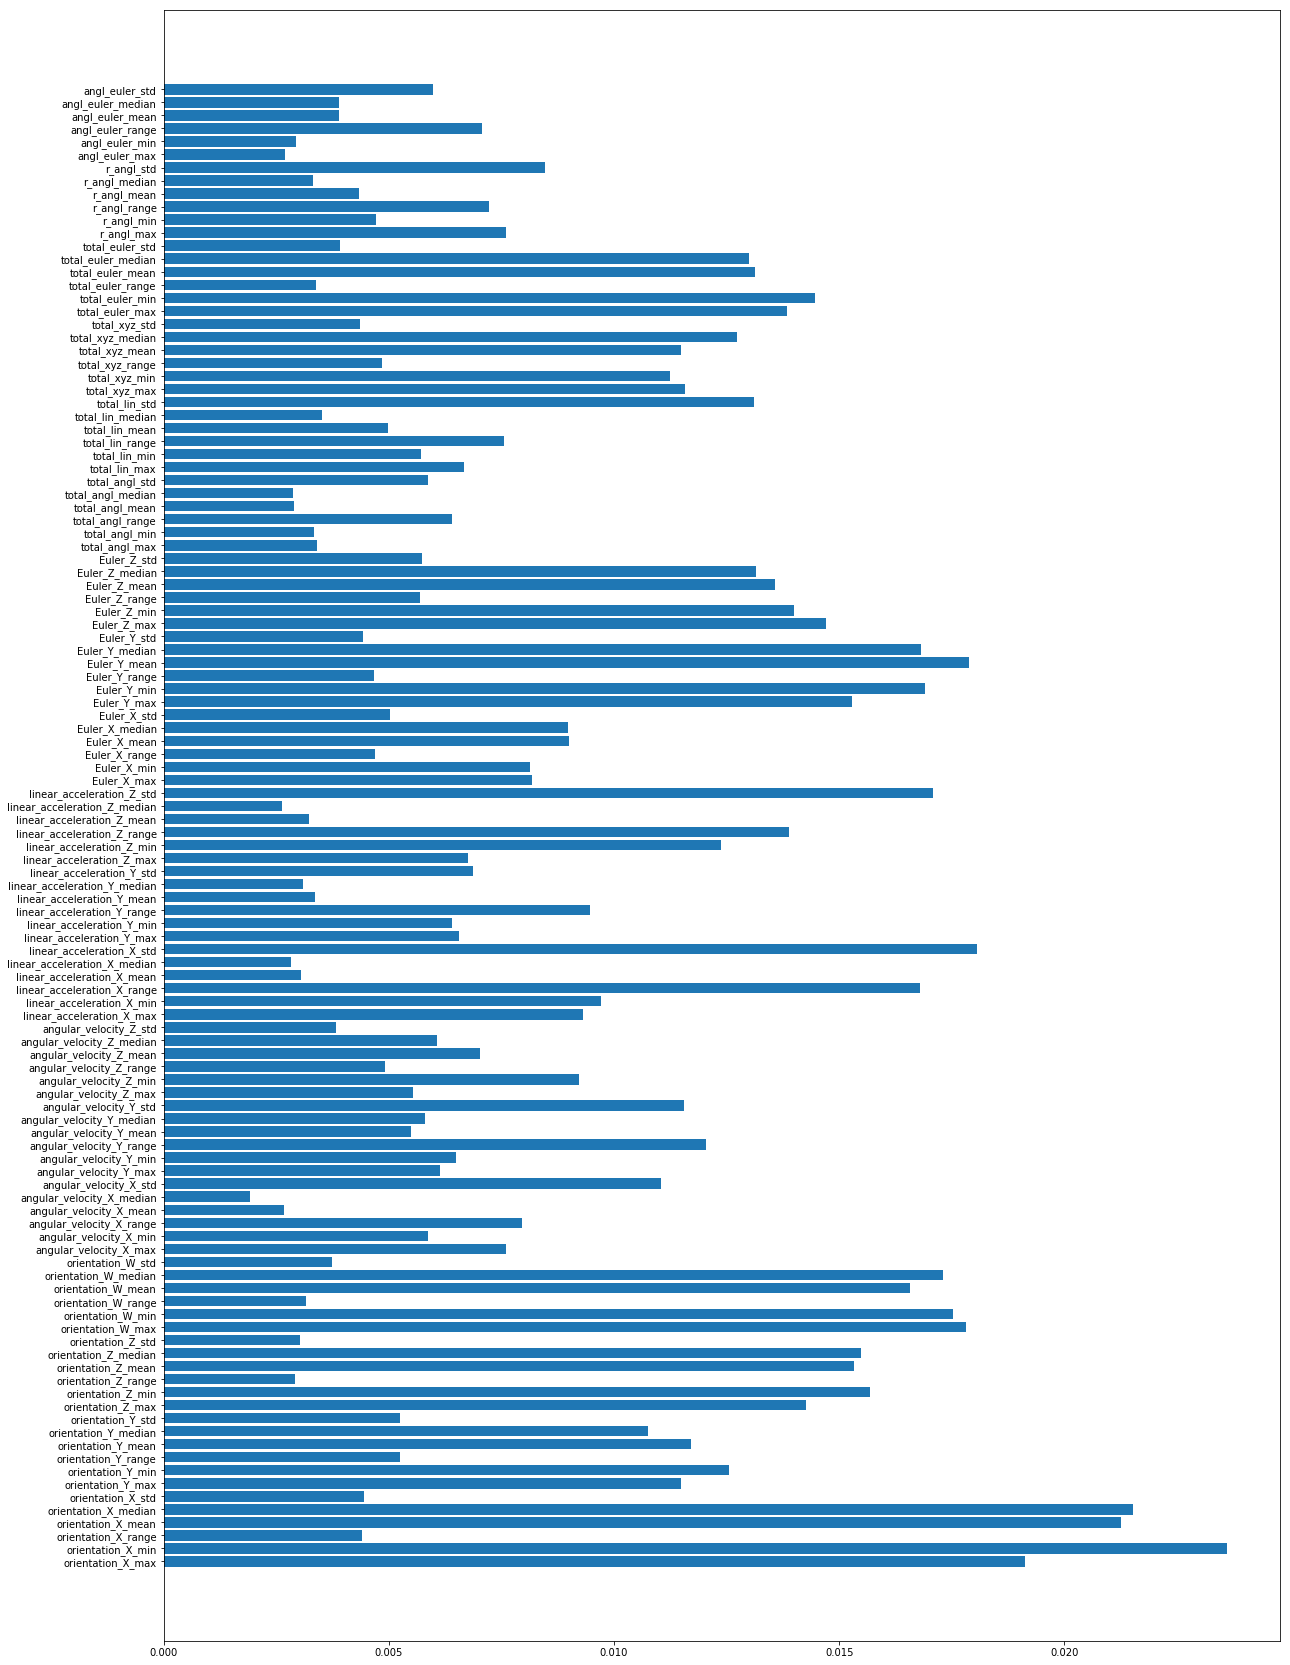

In [27]:
importance=Model_train.feature_importances_
features=X_train_new.columns
print(type(importance))
plt.figure(figsize=(20,30))
plt.barh(range(len(importance.tolist())),importance.tolist(),tick_label=features.tolist())
plt.show()

In [28]:
print(tr.shape)
print(y_train_new['surface'].shape)
print(te.shape)

(3790,)
(3790,)
(20, 9)


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(tr,y_train_new['surface'])

array([[159,   5,   0,   0,   3,   3,   2,   4,   1],
       [ 16, 714,  14,   1,   8,  17,   5,  15,  17],
       [  0,   3, 309,   0,   8,   4,   0,   2,   2],
       [  0,   0,   0,  11,   0,   0,   0,   0,   0],
       [  0,   8,   0,   0, 277,   7,   0,   3,   0],
       [  2,  18,   8,   1,   2, 678,   2,   8,  21],
       [  1,   5,   3,   1,   0,   3, 280,   3,   1],
       [  2,   6,   5,   0,   1,   6,   1, 470,  19],
       [  9,  17,  21,   7,   6,  12,   7,   3, 543]])

### Submission

Obviously,in this problem,RandomForest have higher accuracy and run faster than GBDT.

In [30]:
y_test_new['surface']=encoder.inverse_transform(te.argmax(axis=1))
y_test_new.to_csv('submission.csv',index=False)
y_test_new.head(50)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,series_id,group_id,surface
3790,3790,59,hard_tiles_large_space
3791,3791,42,concrete
3792,3792,69,soft_pvc
3793,3793,55,tiled
3794,3794,40,hard_tiles_large_space
3795,3795,39,concrete
3796,3796,46,wood
3797,3797,48,fine_concrete
3798,3798,39,concrete
3799,3799,55,tiled
